

# Investigation of Movies Budget/Profit Relation (using IMDB data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [2]:
# Importing required packages
import pandas as pd
import matplotlib as plt
import seaborn
#import pandoc

In [3]:
#import movies csv as dataframe
movdf=pd.read_csv('tmdb-movies.csv') #movdf = movies dataframe
#magic to have plots in notebook
%matplotlib inline 

In [4]:
#Investigating csv contents
movdf.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [5]:
#Showing general stats of dataset
movdf.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


A portion of the dataset seems to lack budget and revenue data. A count of those cells is necessary to see if it is significant enough to affect the data and possibly even completely remove them from data set

In [6]:
#number of budgetless movies
budgless=movdf['budget_adj'].isin([0]) # creat a bool of budget less movies

Now we need to check if the budgetless data have any common properties (i.e. the data is not skewed). To determine if we can remoe it with consequences to analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002498554D9C8>,
      dtype=object)

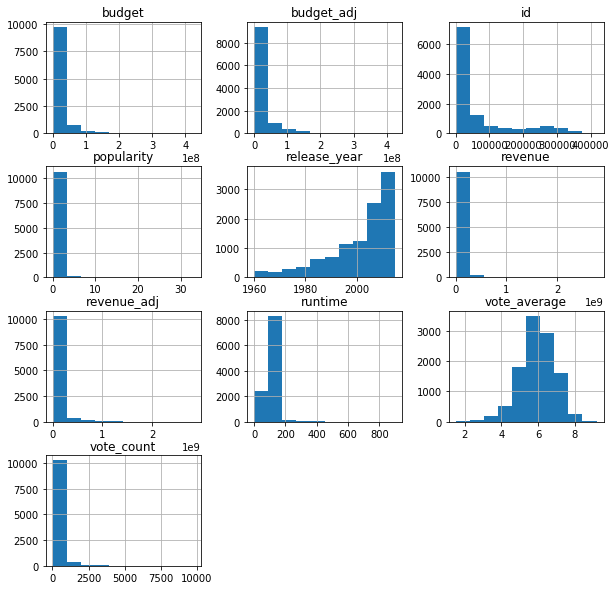

In [7]:
movdf.hist(figsize=(10,10)) #plotting for whole data set

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002498558E848>,
      dtype=object)

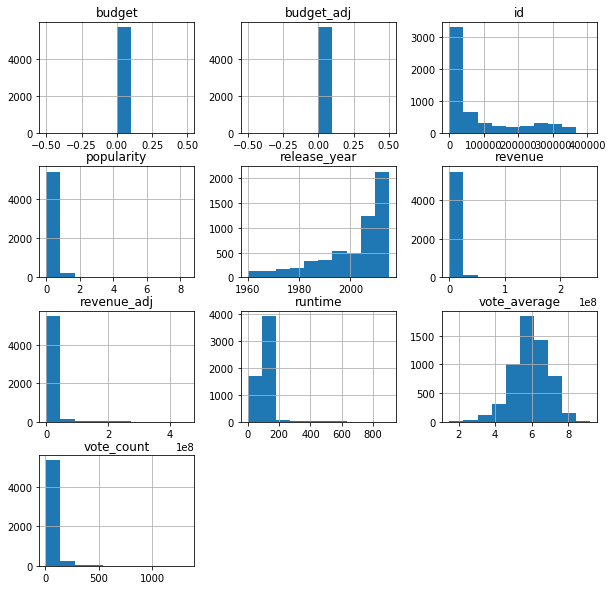

In [8]:
movdf[budgless].hist(figsize=(10,10)) #plot for budgetless

Comparing the figures it seems that the budget less data is very similar to the general. Therefore it is reasonable to say that we can ignore the data for the purpose of our analysis. Also note that there seems to be revenue data even if there is not budget data. Therefore a similar comparison needs to be done to see if we can remove the revenue-less data as well.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024985F20F08>,
      dtype=object)

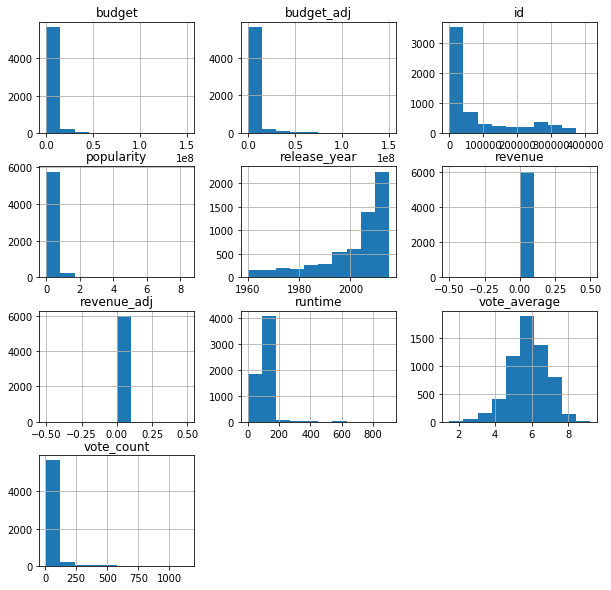

In [9]:
#creating revenue less boolean vector
revless=movdf['revenue_adj'].isin([0])
movdf[revless].hist(figsize=(10,10)) #plot for revless

Again the revenue-less movies show the same trends as the general dataset.now proceed to create new clean dataframe with no movies that have no budget or revenue.

In [10]:
#removing movies that don't have budget or revenue data
budgRevLess=movdf.drop(movdf[budgless|revless].index)
#getting describe to check if data set now is fixed
budgRevLess.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


As shown in the table above there aren't revenueless or budgetless data anymore. 


### Data Cleaning: Removing Duplicates

Last step before continuing analysis is to check for duplicates on the (id or movie names)

In [11]:
#Check and print any duplicates
print(budgRevLess[budgRevLess.duplicated(keep='first')])

         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


Duplicate entries found; so perform clean up

In [12]:
#remove any duplicates and create a new CLEANED data frame
CleanDf=budgRevLess.drop(budgRevLess[budgRevLess.duplicated(keep='first')].index)

Perform a final check to see if there are any movies who share the same ID or imdb_id

In [13]:
CleanDf.duplicated(['id'],keep='first').sum()

0

In [14]:
CleanDf.duplicated(['imdb_id'],keep='first').sum()

0

No duplicate IDs

Dropping columns that wont be used to have a smaller dataframe

In [15]:
df=CleanDf.drop(['budget', 'revenue', 'cast', 'homepage', 'tagline','keywords',\
                 'overview','genres','production_companies'], axis=1)
df.head()

,id,imdb_id,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Is there a correlation between budget and profit ?

First we need to calculate the profit

In [16]:
#calculating profit for all movies
df['profit']=df['revenue_adj']-df['budget_adj']

count    3.854000e+03
mean     9.282470e+07
std      1.940715e+08
min     -4.139124e+08
25%     -1.504995e+06
50%      2.737064e+07
75%      1.074548e+08
max      2.750137e+09
Name: profit, dtype: float64

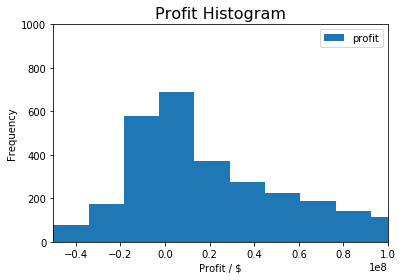

In [17]:
#Plotting histogram of profit
histProf=df.plot(kind='hist', y='profit', bins=200)

#graph formatting
histProf.axis([(-0.5)*(10**8), 1*(10**8), 0, 1000])
histProf.set_title('Profit Histogram', fontsize=16)
histProf.set_xlabel('Profit / $')

#Stats on Profit
df['profit'].describe()

The mean of the profits is found to be approx. 93 million with a standard deviation of about 194 million. The histogram confirms this with a flat distribution. Note that the axes where changed, avoiding showing highly performing or under performing anomalies (movies) to get a more represantative plot.

[0, 250000000.0, -200000000.0, 1000000000]

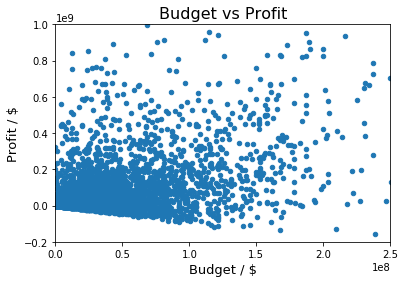

In [18]:
#plotting a scatter of revenue vs budget
BudgProf=df.plot(kind='scatter', x='budget_adj', y='profit')

BudgProf.set_title('Budget vs Profit', fontsize=16)
BudgProf.set_xlabel('Budget / $', fontsize=13)
BudgProf.set_ylabel('Profit / $', fontsize=13)
BudgProf.axis([0*(10**9), 0.25*(10**9), -0.2*(10**9), 1*(10**9)])


Interestingly there is a slight negative correlation in lower budget lower profit movies (bottom left corner of the graph. It seems that in that section of data, the higher the budget the lower the profit. This doesn't seem tp be particularly true for Budget more than approx 120 million (and profit more than 300 million). Data outside of that area seems to scatter with no visible correlation

Profit is Revenue minus the budget. Therefore what this is implying that for movies with budgets less than 120 million there is no correlation in revenue increase. Lets plot budget against revenue to test out that theory. Note that all values are adjusted for inflation.

[0, 250000000.0, -200000000.0, 1500000000.0]

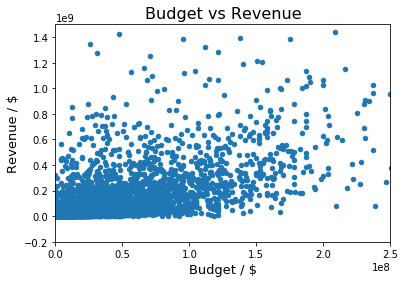

In [19]:
#Plotting budget against revenue
budgRev=df.plot(kind='scatter', x='budget_adj', y='revenue_adj')

#Formatting Plots
budgRev.set_title('Budget vs Revenue', fontsize=16)
budgRev.set_xlabel('Budget / $', fontsize=13)
budgRev.set_ylabel('Revenue / $', fontsize=13)
budgRev.axis([-0*(10**8), 2.5*(10**8), -0.2*(10**9), 1.5*(10**9)])

The Budget/Revenue plot seems to confirm what we considered in our theory above. There is no correlation for a budget less than 120 million but revenue starts increasing as budget increases beyond that point.

Therefore the preliminary analysis implies that investing more in movies with less than 120 million budget would not be a positive return on investement. While for very high budget movies there is a a stronger return on investement.

### Question 2: Do highly rated movies have higher budgets?

count    3854.000000
mean        6.168163
std         0.794920
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

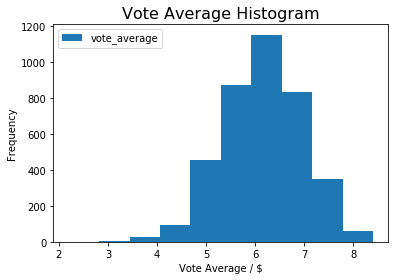

In [20]:
#Get descriptive statistics of vote average and plot 
histVote=df.plot(kind='hist', y='vote_average')

histVote.set_title('Vote Average Histogram', fontsize=16)
histVote.set_xlabel('Vote Average / $')

df['vote_average'].describe()

Following a similar method as the previous question, we get the histogram of the vote average. We can see a very nice bell curve distribution about the IMDB average of 6.16 with a surprisingly low maximum of 8.4

The plot should e useful in the rest of the analysis to identify if the correlations seen just follow the vote average behaviour.

Text(0, 0.5, 'Budget / $')

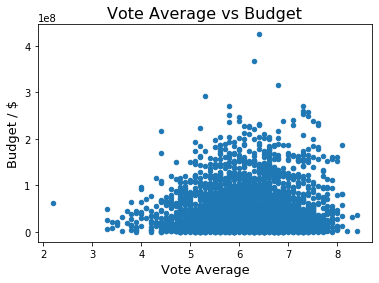

In [21]:
#Plotting Ratings and Budgets
ratBud=df.plot(kind='scatter', x='vote_average', y='budget_adj')

ratBud.set_title('Vote Average vs Budget', fontsize=16)
ratBud.set_xlabel('Vote Average', fontsize=13)
ratBud.set_ylabel('Budget / $', fontsize=13)

Looking at the scatter plot the Budget distribution seems to follow that of the average vote histogram distribution. The plot therefore could be called misleading as there are "more" data points (movies) around the mean for vote averages. Therefore the chance of having movies (datapoints) that have higher budgets. Therefore saying that movies with an IMDB vote of 6.16 (the mean) usually have higher budgets is misleading. Beacuse that correlation could be due to the amount of data points we have not because of true correlation.

### Bonus: Most Profitable Directors (out of curiosity!)

In [22]:
#Grouping data by Director and getting mean profit of the director
grpDir=df.groupby('director')
grpDir.mean().sort_values(by=['profit'],ascending=False)

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
director,,,,,,,,,
Irwin Winkler,1642.0,1.136610,114.0,201.0,5.6,1995.0,3.148127e+07,1.583050e+09,1.551568e+09
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,12230.0,2.631987,79.0,913.0,6.6,1961.0,2.917944e+07,1.574815e+09,1.545635e+09
Richard Marquand,1892.0,4.828854,135.0,3101.0,7.8,1983.0,7.082424e+07,1.253819e+09,1.182995e+09
Roger Allers|Rob Minkoff,8587.0,4.782688,89.0,3489.0,7.7,1994.0,6.620002e+07,1.159592e+09,1.093392e+09
Chris Buck|Jennifer Lee,109445.0,6.112766,102.0,3369.0,7.5,2013.0,1.404050e+08,1.192711e+09,1.052306e+09
...,...,...,...,...,...,...,...,...,...
John Bruno,9423.0,0.654013,99.0,60.0,4.9,1999.0,9.817896e+07,1.834073e+07,-7.983823e+07
David Bowers|Sam Fell,11619.0,1.390297,85.0,488.0,6.0,2006.0,1.611687e+08,6.972365e+07,-9.144505e+07
Walter Hill|Jack Sholder,10384.0,0.385350,91.0,42.0,4.7,2000.0,1.139663e+08,1.877668e+07,-9.518961e+07


It seem like the best way to make your movie profitable is to have Irwin Winkler directing it!

<a id='conclusions'></a>
## Conclusions

Initial analysis shows slight correlation that higher budget movies seem to have decreased profits for movies with budgets less than 120 million. Beyond that data seems to be scattered. Of course this data is limited to a specific pool a huge number of datapoints were elminated due to lack of budget or revenue data. The data doesn't imply causation in this case but merely correlation. Further analysis is required to also study other effects on profitability. For example actors involved and maybe time of the year that the movie was released.

No trustable correlation was found when investigating the relation between ratings and budget. The dtapoints seem to follow the general trend of rating averages which implies that more data points are needed to come up with any reasonable conclusion.